## E01 Notebook - Daniel Agraz Vallejo

In [5]:
import tensorflow as tf

#### **E1.1:** Display Tensorflow Version

In [6]:
print(f"Tensorflow Version: {tf.__version__}")

Tensorflow Version: 2.15.0


#### **E1.2:** Tensor Operations

In [7]:
t1 = tf.constant([[1,2,3],
                 [4,5,6]])

print(f'Starting Tensor:\n{t1}\n')

# Addition
print(f'Addition:\n{tf.add(t1,10)}\n')

# Power
print(f'Power:\n{tf.pow(t1,2)}\n')

# Indexing
print(f'Indexing:\n{t1[:,1]}\n')

# Transpose
t1_transposed = tf.transpose(t1)
print(f'Transpose:\n{t1_transposed}\n')

# Multiplication
print(f'Multiplication:\n {tf.matmul(t1,t1_transposed)}\n')

Starting Tensor:
[[1 2 3]
 [4 5 6]]

Addition:
[[11 12 13]
 [14 15 16]]

Power:
[[ 1  4  9]
 [16 25 36]]

Indexing:
[2 5]

Transpose:
[[1 4]
 [2 5]
 [3 6]]

Multiplication:
 [[14 32]
 [32 77]]



#### **E1.3 :** Given function $f(x,y) = x^{2}y + y + 2$ evaluate $f(3,4)$ en Tensorflow

In [8]:
def f(x,y):
    return tf.add(tf.add(tf.multiply(tf.square(x), y), y), 2)

x = tf.constant(3, dtype=tf.int32)
y = tf.constant(4, dtype=tf.int32)

print(f(3,4))

tf.Tensor(42, shape=(), dtype=int32)


#### **E1.4:** Implement price model from California Housing dataset

In [9]:
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import seaborn as sns
import pandas as pd
import numpy as np

ds = ds.fetch_california_housing()

ds_features = pd.DataFrame(ds.data, columns=ds.feature_names)
ds_target = pd.DataFrame(ds.target, columns=ds.target_names)
ds_features.insert(0, 'Intercept', 1)

ds_features

,Intercept,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,1,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,1,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,1,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,1,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,1,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
ds_target

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


**Normal Equation (NE)**  
  
$\theta = (X^{T}X)^{-1} \cdot (X^{T}y)$  
Apply Normal Equation to get $p$ parameters for Logistic Regression

In [11]:
t_features = tf.convert_to_tensor(ds_features)
t_target = tf.convert_to_tensor(ds_target)

def NE(X: tf.Tensor, y: tf.Tensor) -> tf.Tensor:
    X_transpose = tf.transpose(X)
    return tf.matmul(tf.linalg.inv(tf.matmul(X_transpose, X)), tf.matmul(X_transpose,y))

t_theta = NE(t_features, t_target)
t_theta

<tf.Tensor: shape=(9, 1), dtype=float64, numpy=
array([[-3.69419202e+01],
       [ 4.36693293e-01],
       [ 9.43577803e-03],
       [-1.07322041e-01],
       [ 6.45065694e-01],
       [-3.97638942e-06],
       [-3.78654265e-03],
       [-4.21314378e-01],
       [-4.34513755e-01]])>

#### **E1.5:** Implement Ordinary Least Squares (OLS)  
  
$y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{p}x_{p}$

Calculate prediction values with OLS Regression

In [12]:
def OLS(tp, xf):
    return tp[0] + tf.add_n([tf.multiply(tp[i],xf[i]) for i in range(1, len(tp))])

# Get y prediction on a single observation
print(OLS(t_theta, t_features[0, :]))


tf.Tensor([4.13164983], shape=(1,), dtype=float64)


In [13]:
# Getting predictions for all observations
y_preds = []
for x in range(t_features.shape[0]):
    y_preds.append(OLS(t_theta, t_features[x,:]))
y_preds = np.array(y_preds)
y_preds

array([[4.13164983],
       [3.97660644],
       [3.67657094],
       ...,
       [0.17125141],
       [0.31910524],
       [0.51580363]])

#### Pred Values vs Target Values Plot: First 500 values

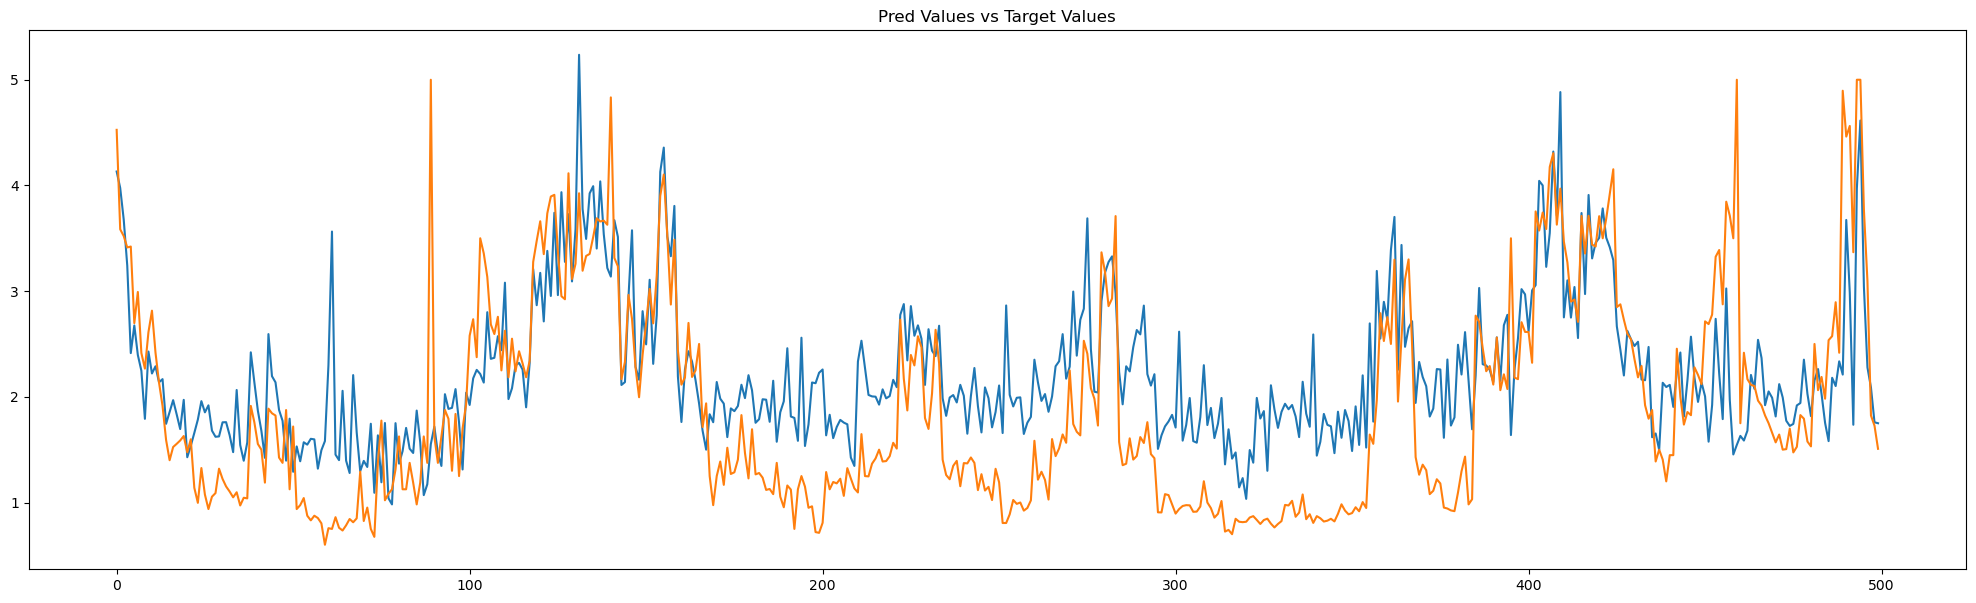

In [14]:
plt.figure(figsize=(25,7))
plt.plot(y_preds[:500], label="Pred Values")
plt.plot(ds_target.to_numpy()[:500], label="Target Values")
plt.title("Pred Values vs Target Values")
plt.show()

#### Feature's Histograms

/Users/kekaz16/miniconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kekaz16/miniconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kekaz16/miniconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kekaz16/miniconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

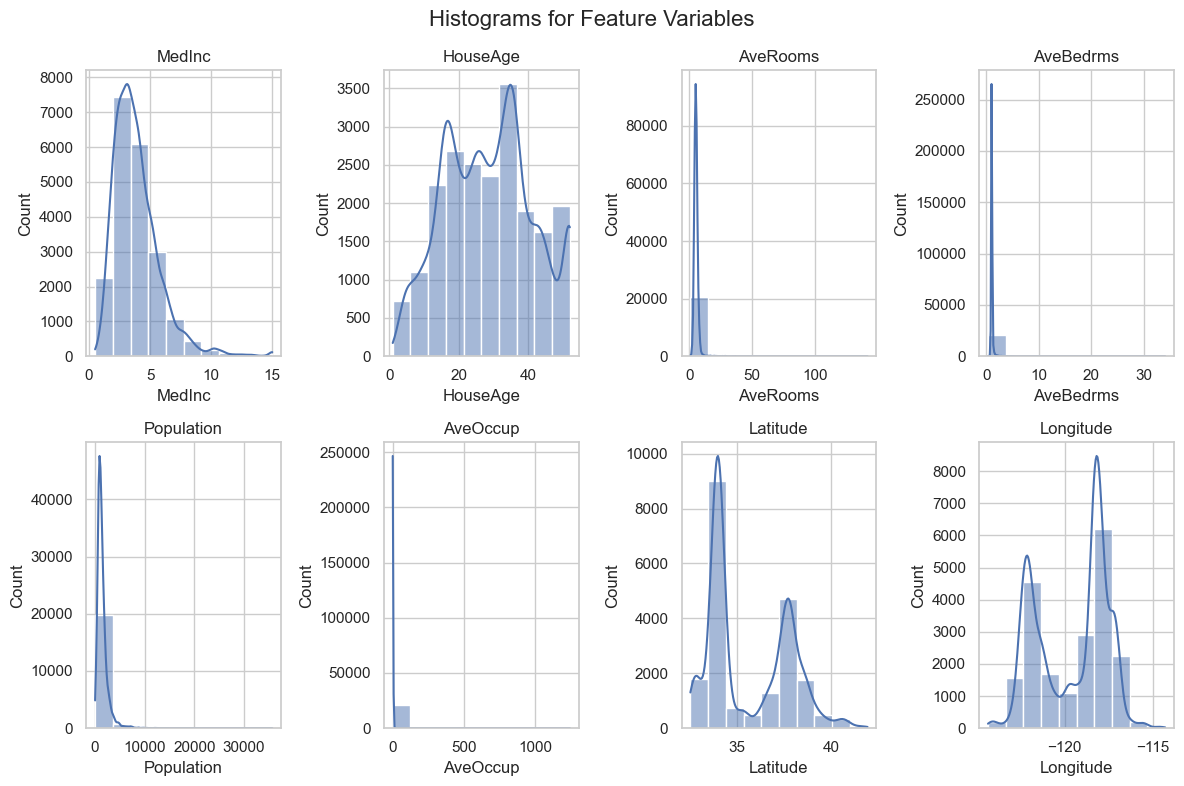

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

hist_features = ds_features.iloc[:,1:]
for i, col in enumerate(hist_features):
    plt.subplot(2,4, i+1)
    sns.histplot(hist_features[col], bins=10, kde=True)
    plt.title(f'{col}')

plt.suptitle("Histograms for Feature Variables", fontsize=16)
plt.tight_layout()
plt.show()

#### Feature's Scatter Plots

In [16]:
ds_features.head()

,Intercept,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,1,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,1,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,1,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
pairplot_df = ds_features.iloc[:,1:]
#pairplot_df.insert(8, 'MedHouseVal', ds_target)
pairplot_df
plot_kws = dict(s=10, fc='orange', alpha=0.9)

**Latitude vs Longitude Scatterplot**

<Axes: xlabel='Longitude', ylabel='Latitude'>

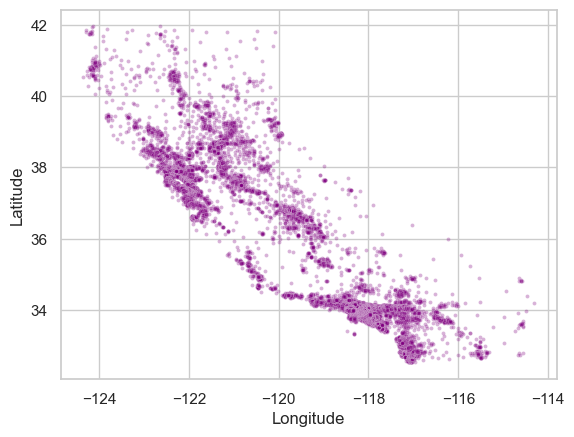

In [21]:
# Latitude vs Longitude
sns.scatterplot(
    x='Longitude', 
    y='Latitude', 
    data=ds_features[['Latitude', 'Longitude']], 
    markers='o',
    alpha=0.3,
    fc='purple', 
    s=8)

**Average Rooms's Scatterplots**

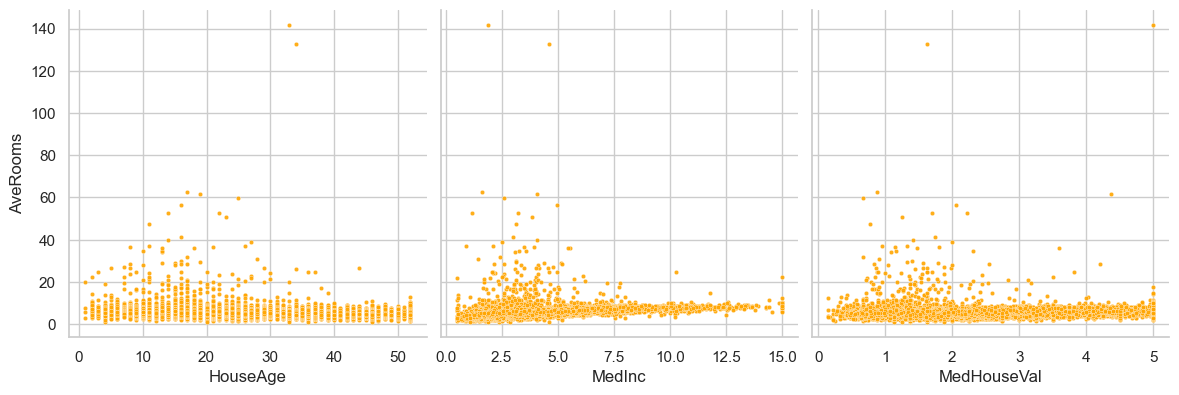

In [22]:
sns.pairplot(
    pairplot_df,
    x_vars=["HouseAge", "MedInc", "MedHouseVal"],
    y_vars=["AveRooms"],
    kind='scatter',
    markers='o',
    plot_kws=plot_kws,
    height=4)

**House Age's Scatterplots**

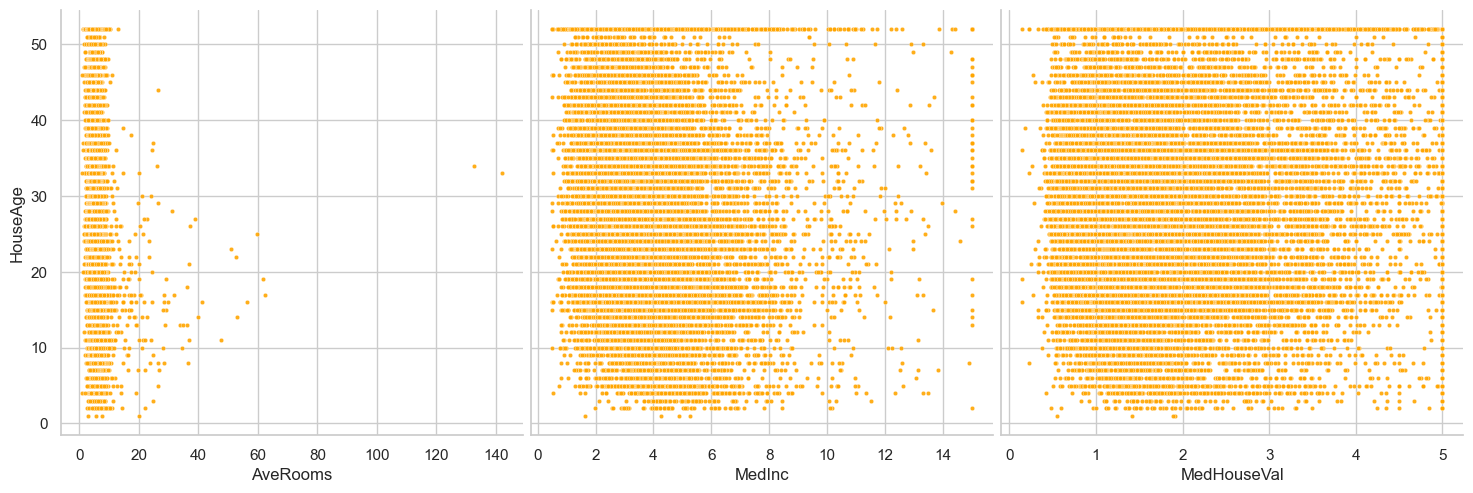

In [23]:
sns.pairplot(
    pairplot_df,
    x_vars=["AveRooms", "MedInc", "MedHouseVal"],
    y_vars=["HouseAge"],
    kind='scatter',
    markers='o',
    plot_kws=plot_kws,
    height=5)

**Median Income's Scatterplots**

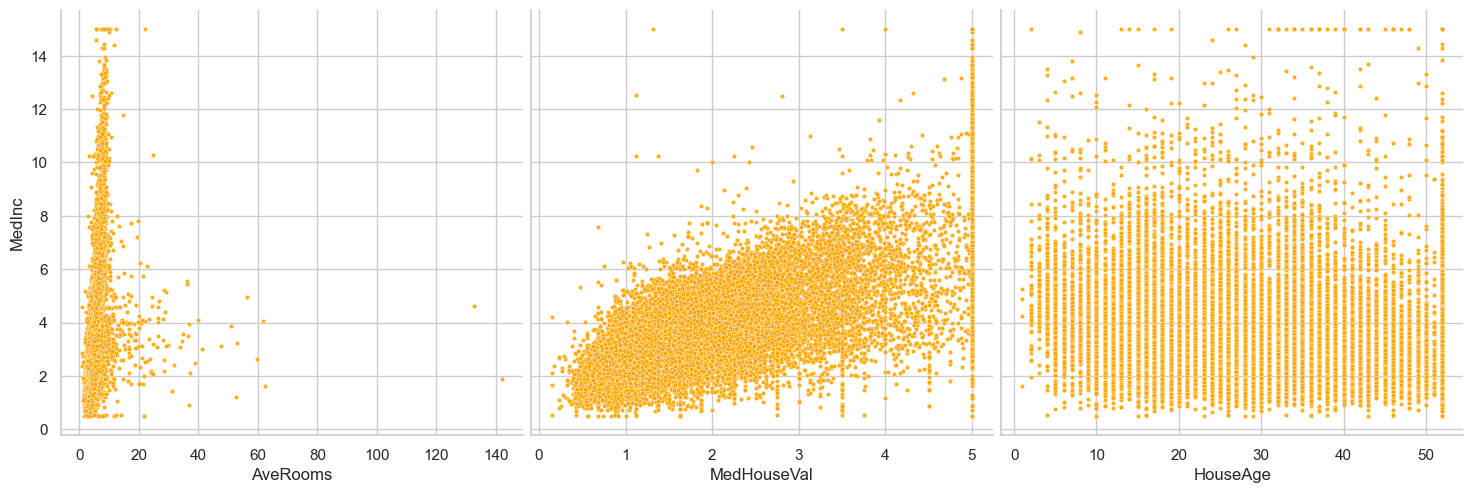

In [24]:
sns.pairplot(
    pairplot_df,
    x_vars=["AveRooms", "MedHouseVal", "HouseAge"],
    y_vars=["MedInc"],
    kind='scatter',
    markers='o',
    plot_kws=plot_kws,
    height=5)

**Median House Value's Scatterplots**

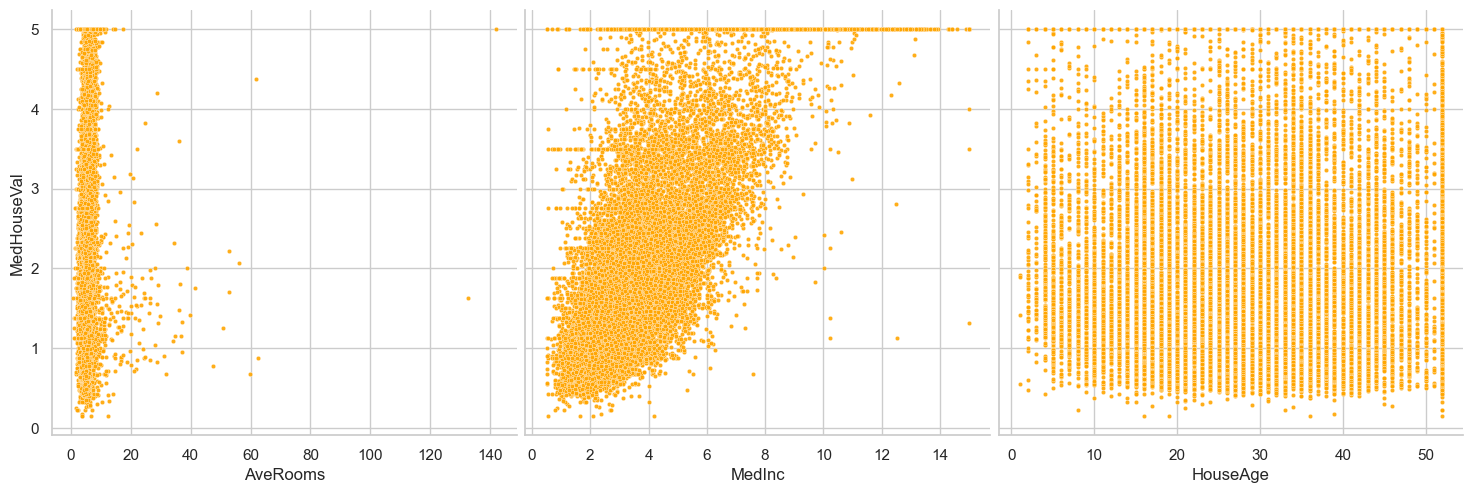

In [25]:
sns.pairplot(
    pairplot_df,
    x_vars=["AveRooms", "MedInc", "HouseAge"],
    y_vars=["MedHouseVal"],
    kind='scatter',
    markers='o',
    plot_kws=plot_kws,
    height=5)